In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
nft_sale = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), 'data','NFT_Sales.csv'))
nft_sale = nft_sale.set_index('Date')
nft_sale.index = pd.to_datetime(nft_sale.index)
nft_sale.head()

,Sales_USD_cumsum,Number_of_Sales_cumsum,Active_Market_Wallets_cumsum,Primary_Sales_cumsum,Secondary_Sales_cumsum,AverageUSD_cum,Sales_USD,Number_of_Sales,Active_Market_Wallets,Primary_Sales
Date,,,,,,,,,,
2017-06-22,0.00,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-23,1020.30,19,8.0,0,19.0,53.70,1020.30,19.0,8.0,0.0
2017-06-24,2261.14,40,21.0,0,21.0,56.53,1240.84,21.0,13.0,0.0
2017-06-25,2778.69,53,28.0,0,13.0,52.43,517.55,13.0,7.0,0.0
2017-06-26,3203.32,67,34.0,0,14.0,47.81,424.63,14.0,6.0,0.0


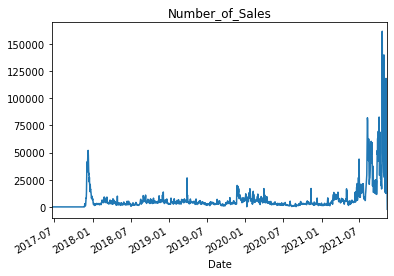

In [32]:
nft_sale['Number_of_Sales'].plot(title = 'Number_of_Sales')

In [28]:
nft_sale.columns

Index(['Sales_USD_cumsum', 'Number_of_Sales_cumsum',
       'Active_Market_Wallets_cumsum', 'Primary_Sales_cumsum',
       'Secondary_Sales_cumsum', 'AverageUSD_cum', 'Sales_USD',
       'Number_of_Sales', 'Active_Market_Wallets', 'Primary_Sales'],
      dtype='object')

In [29]:
nft_sale_copy = nft_sale[['Active_Market_Wallets_cumsum', 'AverageUSD_cum','Number_of_Sales', 'Active_Market_Wallets', 'Primary_Sales']].copy()

c:\users\sarahwang\appdata\local\conda\conda\envs\pcresearch\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\sarahwang\appdata\local\conda\conda\envs\pcresearch\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\sarahwang\appdata\local\conda\conda\envs\pcresearch\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.


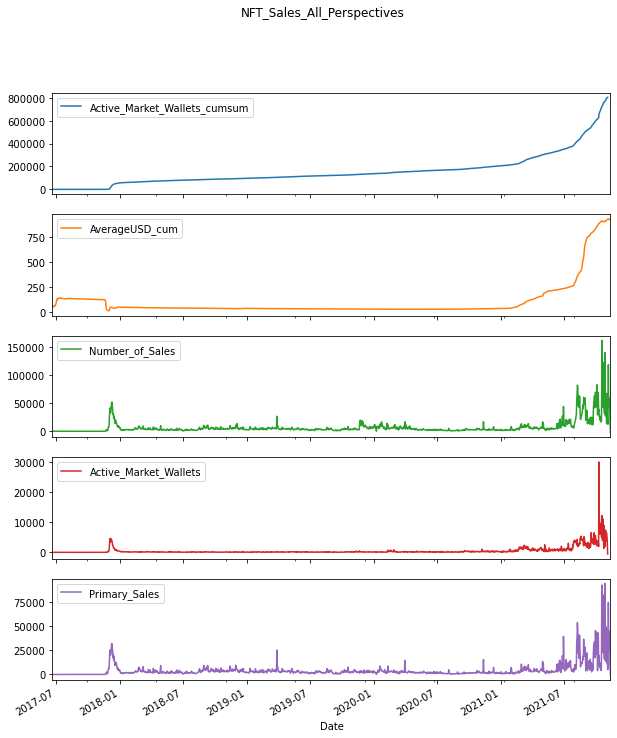

In [33]:
nft_sale_copy.plot(subplots = True,figsize = (10,12), title = 'NFT_Sales_All_Perspectives')
plt.show()

c:\users\sarahwang\appdata\local\conda\conda\envs\pcresearch\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\sarahwang\appdata\local\conda\conda\envs\pcresearch\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\sarahwang\appdata\local\conda\conda\envs\pcresearch\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.


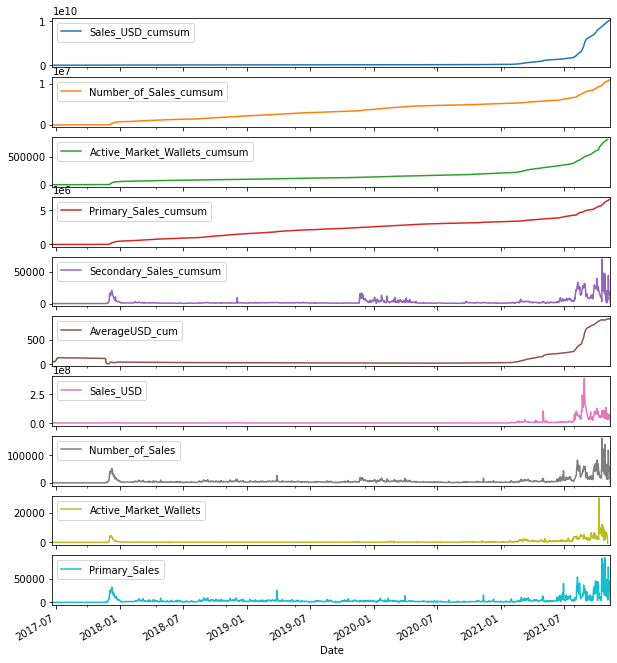

In [27]:
nft_sale.plot(subplots = True,figsize = (10,12))
plt.show()

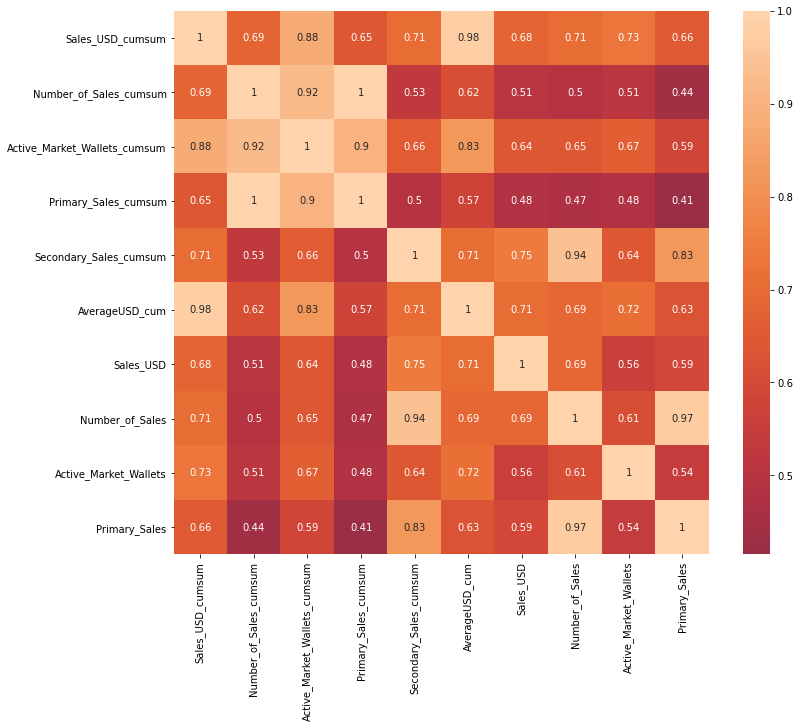

In [4]:
import seaborn as sns
plt.figure(figsize=(12,10))
sns.heatmap(nft_sale.corr(), center=0, annot=True)

In [5]:
nft_transactions = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), 'data','nft_transactions.csv'))
nft_transactions.head()


,Collections,Sales,Buyers,Txns,Owners
0,Axie Infinity,"$3,328,148,500","1,079,811","9,755,511","2,656,431"
1,CryptoPunks,"$1,664,246,968","4,723","18,961","3,289"
2,Art Blocks,"$1,075,223,906","20,934","117,602","25,094"
3,Bored Ape Yacht Club,"$783,882,186","8,284","22,584","5,862"
4,NBA Top Shot,"$781,965,423","374,818","11,790,699","603,928"


In [6]:
#first refinement - renaming columns
nft_transactions.rename(columns = {'Sales':'Sales in USD','Txns':'Transactions'}, inplace = True)
#second refinement - convert to integer for further data processing
nft_transactions['Sales in USD'] = nft_transactions['Sales in USD'].str.replace(',', '')
nft_transactions['Sales in USD'] = nft_transactions['Sales in USD'].str.replace('$', '')
nft_transactions['Buyers'] = nft_transactions['Buyers'].str.replace(',','')
nft_transactions['Transactions'] = nft_transactions['Transactions'].str.replace(',','')
nft_transactions['Owners'] = nft_transactions['Owners'].str.replace(',','')
nft_transactions=nft_transactions.dropna()
nft_transactions.head()

,Collections,Sales in USD,Buyers,Transactions,Owners
0,Axie Infinity,3328148500,1079811,9755511,2656431
1,CryptoPunks,1664246968,4723,18961,3289
2,Art Blocks,1075223906,20934,117602,25094
3,Bored Ape Yacht Club,783882186,8284,22584,5862
4,NBA Top Shot,781965423,374818,11790699,603928


In [7]:
# CONVERTING STRING NUMERICALS TO INT
nft_transactions['Sales in USD'] = nft_transactions['Sales in USD'].astype('int64')
nft_transactions['Buyers'] = nft_transactions['Buyers'].astype('int64')
nft_transactions['Transactions'] = nft_transactions['Transactions'].astype('int64')
nft_transactions['Owners'] = nft_transactions['Owners'].astype('int32')

In [8]:
nft_transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 249
Data columns (total 5 columns):
Collections     244 non-null object
Sales in USD    244 non-null int64
Buyers          244 non-null int64
Transactions    244 non-null int64
Owners          244 non-null int32
dtypes: int32(1), int64(3), object(1)
memory usage: 10.5+ KB


In [9]:
nft_transactions.describe().style.background_gradient()

,Sales in USD,Buyers,Transactions,Owners
count,244,244,244,244
mean,5.96775e+07,12591.7,137918,28847.9
std,2.57398e+08,77380,1.02168e+06,238413
min,2.49880e+06,31,47,1
25%,4.62768e+06,2346.75,5928.5,2533.75
50%,1.13997e+07,3977,9527.5,3536
75%,3.39431e+07,5583.5,14436.2,4883.5
max,3.32815e+09,1.07981e+06,1.17907e+07,2.65643e+06


In [10]:
top_collections = nft_transactions.groupby('Collections').sum().sort_values('Sales in USD', ascending = False).head(30)

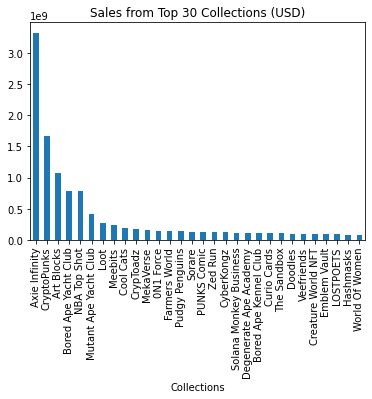

In [11]:
top_collections['Sales in USD'].plot.bar(title = 'Sales from Top 30 Collections (USD)')

In [12]:
# hypothesis: DOES MORE NUMBER OF buyers PROVE MORE SALES

In [13]:
nft_transactions = nft_transactions.set_index('Collections')

Text(0.5, 0.98, 'Box Plot')

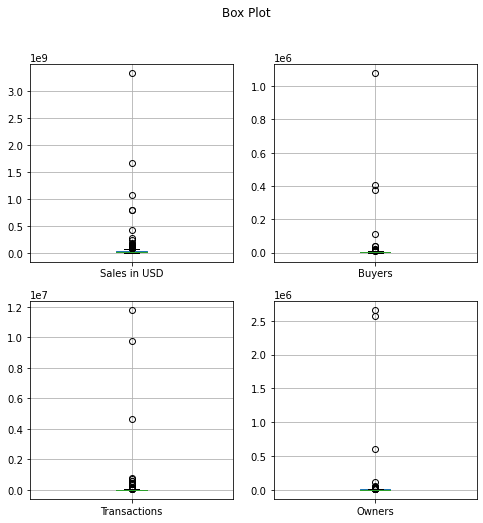

In [14]:
fig = plt.figure(figsize=(8, 8))
plt.grid()
counter = 0
for col in nft_transactions.columns:
    counter = counter + 1
    axis = plt.subplot(2, 2, counter)
    df = nft_transactions[col].to_frame()
    df.boxplot()
fig.suptitle('Box Plot')   
# plt.tight_layout()

Text(0.5, 1.08, 'Distribution & Scatter Plot - Full Sample')

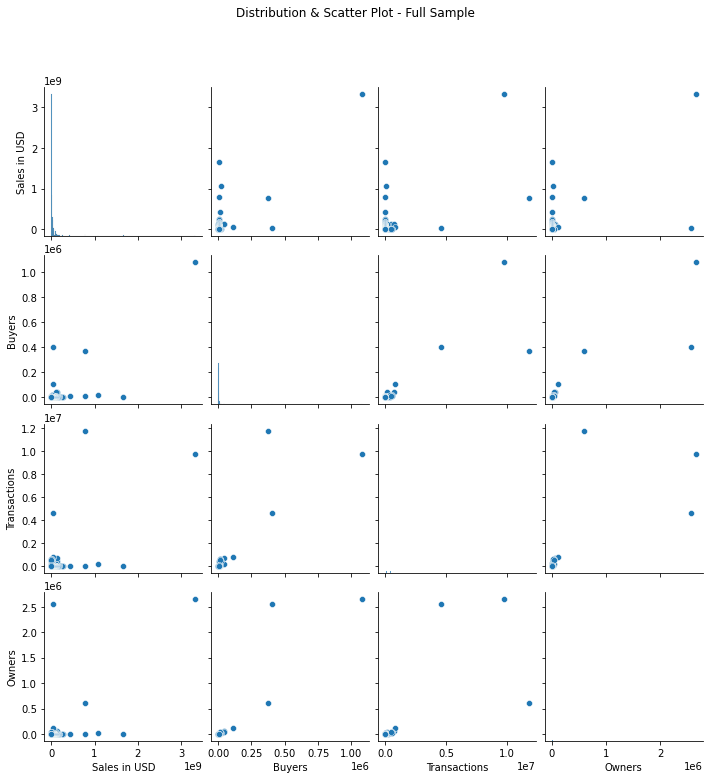

In [15]:
g = sns.pairplot(nft_transactions,diag_kind = 'auto')
g.fig.suptitle('Distribution & Scatter Plot - Full Sample', y=1.08)

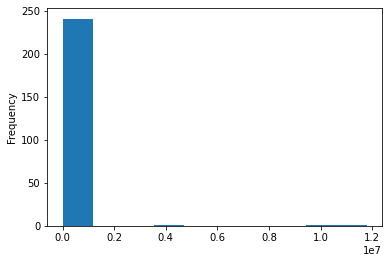

In [16]:
nft_transactions['Transactions'].plot.hist()

In [17]:
# third refinement remove top 10th percentile that skews the distribution
refined_df = nft_transactions[~nft_transactions[nft_transactions<nft_transactions.quantile(0.90)].isnull()].dropna()

In [18]:
corr = refined_df.corr()

In [19]:
def background_gradient(s, m, M, cmap='PuBu', low=0, high=0):
    rng = M - m
    norm = colors.Normalize(m - (rng * low),
                            M + (rng * high))
    normed = norm(s.values)
    c = [colors.rgb2hex(x) for x in plt.cm.get_cmap(cmap)(normed)]
    return ['background-color: %s' % color for color in c]

In [34]:
corr

,Sales in USD,Buyers,Transactions,Owners
Sales in USD,1.000000,0.375564,0.392677,0.141006
Buyers,0.375564,1.000000,0.924080,0.730831
Transactions,0.392677,0.924080,1.000000,0.667291
Owners,0.141006,0.730831,0.667291,1.000000


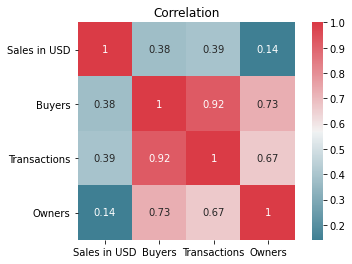

In [20]:
g = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True,annot=True).set_title('Correlation')


Text(0.5, 1.08, 'Distribution & Scatter Plot - 90th Percentile')

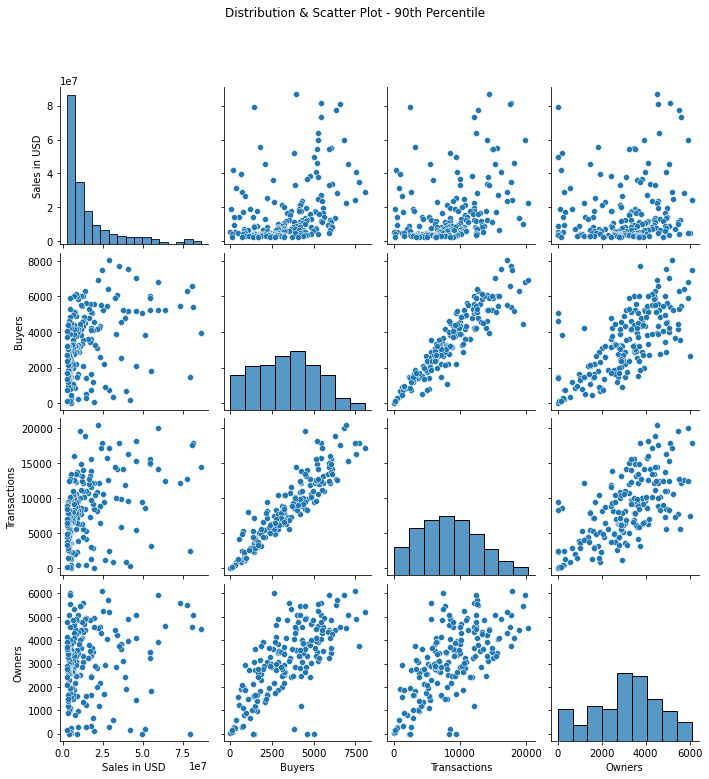

In [21]:
g = sns.pairplot(refined_df)
g.fig.suptitle('Distribution & Scatter Plot - 90th Percentile', y=1.08)